In [1]:
"""In this project, I am going to work with data from the Survey of Consumer Finances (SCF). The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and I'll work with an extract of the results from 2019."""

"In this project, I am going to work with data from the Survey of Consumer Finances (SCF). The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and I'll work with an extract of the results from 2019."

In [2]:
#importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
#reading the data into a dataframe and printing its shape and head
df = pd.read_csv("C:/Users/HP/Downloads/scfp2019excel/SCFP2019.csv")
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [4]:
"""The major concern for this analysis are for households that have been turned down or feared being turned down for credit"""

'The major concern for this analysis are for households that have been turned down or feared being turned down for credit'

In [5]:
#creating a mask for houselholds that have been turned down or fear to be turned down
mask = df["TURNFEAR"]==1

In [6]:
#using the mask to filter the credit fearful repondents from the entire data
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [7]:
"""Exploratory Analysis"""

'Exploratory Analysis'

In [8]:
"""Taking a look at the various age groups that are credit fearful, from the code of survey, the agecl columns shows the various age categories"""

'Taking a look at the various age groups that are credit fearful, from the code of survey, the agecl columns shows the various age categories'

In [9]:
#displaying the unique age classifications
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


In [10]:
#Create a Series agecl that contains the observations from "AGECL" using the true group age range
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
#checking the head of the series
age_cl.head(10)

5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

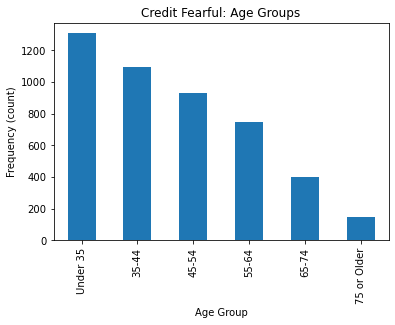

In [11]:
#creating a bar chart showing the credit fearful age groups
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind="bar", xlabel="Age Group", ylabel="Frequency (count)", title="Credit Fearful: Age Groups");

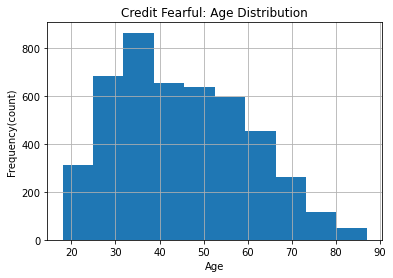

In [12]:
# Plot histogram of "AGE"
df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency(count)")
plt.title("Credit Fearful: Age Distribution");

In [13]:
"""from the code book we can see that there are four 'RACE' categories; 1= White Non Hispanic, 2= Black/ African American, 3= Hispanic, 5= Other"""

"from the code book we can see that there are four 'RACE' categories; 1= White Non Hispanic, 2= Black/ African American, 3= Hispanic, 5= Other"

In [14]:
#Create a Series 'race' that contains the observations from "RACE" using the true group names
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)

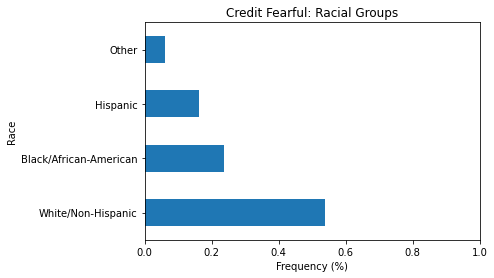

In [15]:
#Creating a horizontal bar plot for the Race, in percentage
race_value_counts= race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

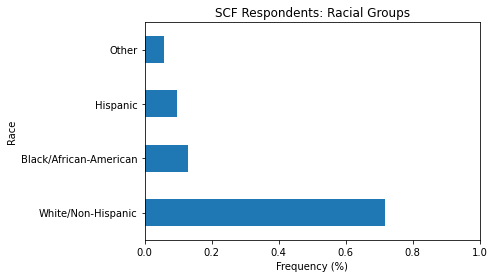

In [16]:
#Recreating the horizontal bar chart for 'RACE' in the entire dataset
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

In [17]:
"""Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, I need to again compare the entire dataset with our subgroup(credit fearful) using the "INCCAT" feature, which captures income percentile groups"""

'Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, I need to again compare the entire dataset with our subgroup(credit fearful) using the "INCCAT" feature, which captures income percentile groups'

In [18]:
#Create a DataFrame df_inccat that shows the normalized frequency for income categories for both the credit fearful and non-credit fearful households in the dataset
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (df["INCCAT"].replace(inccat_dict).groupby(df["TURNFEAR"]).value_counts(normalize=True).rename("Frequency").to_frame().reset_index())

df_inccat

,TURNFEAR,INCCAT,Frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


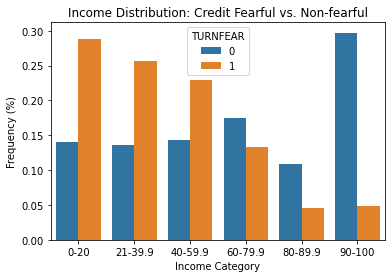

In [19]:
# Creating a side by side bar chart of `df_inccat`
sns.barplot(x="INCCAT", y= "Frequency", hue= "TURNFEAR", data= df_inccat, order= inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

In [20]:
#Calculating the correlation coefficient for "ASSET" and "HOUSES" in the whole dataset df
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


In [21]:
#Calculating the correlation coefficient for "ASSET" and "HOUSES" in the whole credit-fearful subset df_fear.
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735979152


In [22]:
#Making a correlation matrix using the entire dataset, considering only the columns "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC"
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [23]:
#Making a correlation matrix using credit fearful households dataset
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


In [24]:
""" This suggests that the main source of debt being carried by our "TURNFEAR" is their Houses."""

' This suggests that the main source of debt being carried by our "TURNFEAR" is their Houses.'

In [25]:
#Creating a DataFrame df_educ that shows the normalized frequency for education categories for both the credit fearful and non-credit fearful households in the dataset
df_educ = (df["EDUC"].groupby(df["TURNFEAR"]).value_counts(normalize=True).rename("Frequency").to_frame().reset_index())
df_educ.head()

,TURNFEAR,EDUC,Frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


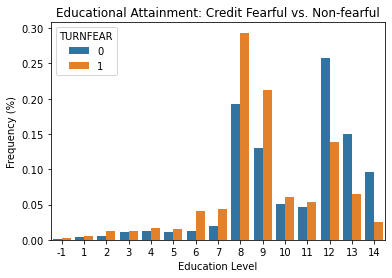

In [26]:
# Creating side by side bar chart of `df_educ`
sns.barplot(x="EDUC", y= "Frequency", hue= "TURNFEAR", data= df_educ)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In [27]:
"""In this plot, we can observe that a much higher proportion of credit-fearful have only a high school diploma, while university degrees are more common among the non-credit fearful."""

'In this plot, we can observe that a much higher proportion of credit-fearful have only a high school diploma, while university degrees are more common among the non-credit fearful.'

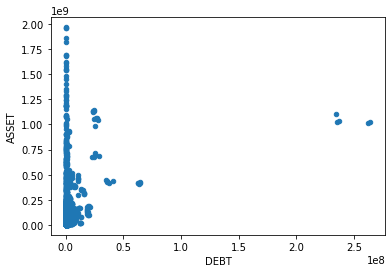

In [28]:
# Creating a scatter plot of ASSET vs DEBT, using the entire dataset
df.plot.scatter(x="DEBT", y="ASSET");

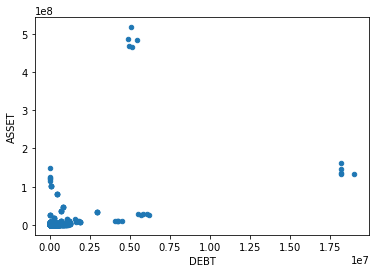

In [29]:
# Creating a scatter plot of ASSET vs DEBT, using only the credit fearful households
df_fear.plot.scatter(x="DEBT", y="ASSET");


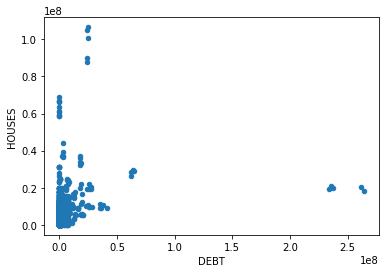

In [30]:
# Create scatter plot of HOUSES vs DEBT, using the entire dataset
df.plot.scatter(x="DEBT", y="HOUSES");

In [31]:
"""CLUSTERING WITH TWO FEATURES"""

'CLUSTERING WITH TWO FEATURES'

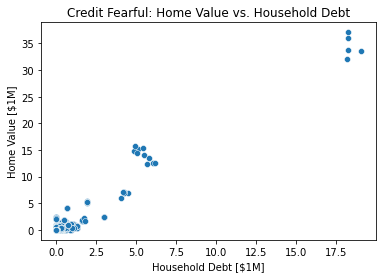

In [32]:
# Plot "HOUSES" vs "DEBT" using the credit fearful household dataset
sns.scatterplot(x=df_fear["DEBT"]/1e6, y=df_fear["HOUSES"]/1e6 )
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [33]:
# Create the feature matrix X. It should contain two features only: "DEBT" and "HOUSES"
X = df_fear[["DEBT", "HOUSES"]]
print(X.shape)
X.head()

(4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


In [34]:
"""Build Model; Build a KMeans model, assign it to the variable name model, and fit it to the training data X"""


'Build Model; Build a KMeans model, assign it to the variable name model, and fit it to the training data X'

In [35]:
# Build model
model = KMeans(n_clusters=3, random_state=42)
# Fit model to data
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [36]:
#Extract the labels that the model created during training and assign them to the variable labels
labels = model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

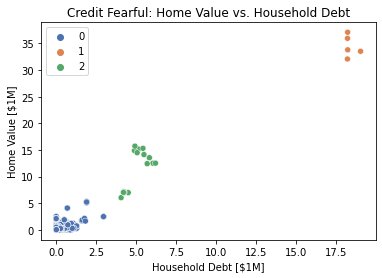

In [37]:
#Recreate the "Home Value vs. Household Debt" scatter plot
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(x=df_fear["DEBT"]/1e6, y=df_fear["HOUSES"]/1e6, hue= labels, palette="deep")
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [38]:
#Extract the centroids that the model created during training, and assign them to the variable centroids
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328699],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

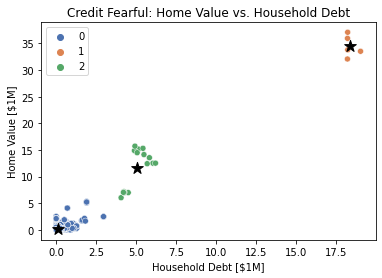

In [39]:
# Plot "HOUSES" vs "DEBT", add centroids for the Credit fearful households
sns.scatterplot(x=df_fear["DEBT"]/1e6, y=df_fear["HOUSES"]/1e6, hue= labels, palette="deep"),
plt.scatter(x=centroids[:,0]/1e6, y=centroids[:,1]/1e6, color= "black", marker= "*", s=150)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [40]:
#Extract the inertia for the model and assign it to the variable inertia
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 939554010797046.9


In [41]:
#Calculate the silhouette score for the model and assign it to the variable ss
ss = silhouette_score(X, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9768842462944348


In [42]:
#Using a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive)
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #Build model
    model=KMeans(n_clusters=k, random_state=42)
    #train model
    model.fit(X)
    #calculate inertia
    inertia_errors.append(model.inertia_)
    #calculate ss
    silhouette_scores.append(silhouette_score(X, model.labels_))

print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [3018038313336920.0, 939554010797046.9, 546098841715654.56, 309310386410920.3, 235243397481789.06, 182225729179699.88, 150670779013795.2, 114321995931020.75, 100340259483917.2, 86229997033602.47, 74757234072100.47]

Silhouette Scores: [0.9855099957519555, 0.9768842462944348, 0.9490311483406091, 0.839330043242819, 0.7287406719898627, 0.726989114305748, 0.7263840026889208, 0.7335125606476427, 0.692157992955073, 0.6949309528556856, 0.6951831031001252]


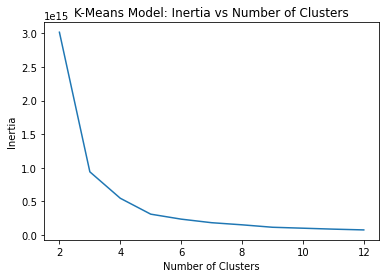

In [43]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

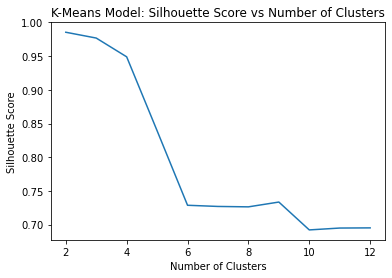

In [44]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

In [45]:
# Build model
final_model = KMeans(n_clusters=4, random_state=42)
# Fit model to data
final_model.fit(X)

KMeans(n_clusters=4, random_state=42)

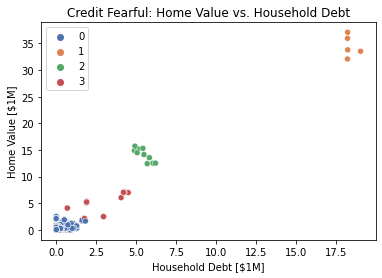

In [46]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(x=df_fear["DEBT"]/1e6, y=df_fear["HOUSES"]/1e6, hue= final_model.labels_, palette="deep")
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");


In [47]:
# Create a DataFrame xgb that contains the mean "DEBT" and "HOUSES" values for each of the clusters for the final_model
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,5.472800e+06,1.407400e+07
3,2.420929e+06,4.551429e+06


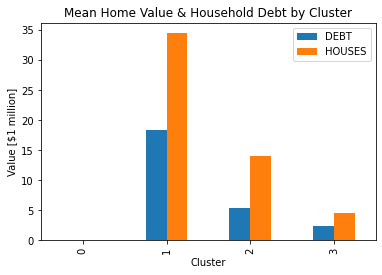

In [48]:
# Create side-by-side bar chart of `xgb`
(xgb/1e6).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");